In [17]:
import pandas as pd
import numpy as np
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

In [18]:
servername = 'LAPTOP-RPEMJO16\\SQLEXPRESS'

In [19]:
conn = pyodbc.connect('DRIVER={SQL SERVER};SERVER='+servername+';DATABASE=UnitedOutdoors; Trusted_Connection=yes')

In [20]:
orders = pd.read_sql_query('SELECT * FROM order_details', conn)
products = pd.read_sql_query('SELECT * FROM product', conn)
products = products[['product_productid', 'product_category']]
df = pd.merge(orders, products, on= 'product_productid')
df


C:\Users\kwand\AppData\Local\Temp\ipykernel_24432\1961401701.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders = pd.read_sql_query('SELECT * FROM order_details', conn)
C:\Users\kwand\AppData\Local\Temp\ipykernel_24432\1961401701.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products = pd.read_sql_query('SELECT * FROM product', conn)


,order_details_sk,order_id,product_quantity,product_listprice,order_date,shipping_date,product_productid,product_sk,employee_employeeid,employee_sk,customer_id,customer_sk,source,product_category
0,1,2001,12,9.00,1996-03-14,1996-09-15,300,None,299.0,None,101,None,AC,Clothes
1,2,2001,12,14.00,1996-03-14,1996-09-14,301,None,299.0,None,101,None,AC,Clothes
2,3,2001,12,14.00,1996-03-14,1996-09-14,302,None,299.0,None,101,None,AC,Clothes
3,4,2002,24,9.00,1996-03-18,1996-09-18,400,None,467.0,None,102,None,AC,None
4,4,2002,24,9.00,1996-03-18,1996-09-18,400,None,467.0,None,102,None,AC,Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124926,124571,75122,1,21.98,2014-06-30,2014-07-07,878,None,NaN,None,15868,None,AW,Accessories
124927,124572,75122,1,8.99,2014-06-30,2014-07-07,712,None,NaN,None,15868,None,AW,Clothing
124928,124573,75123,1,21.98,2014-06-30,2014-07-07,878,None,NaN,None,18759,None,AW,Accessories
124929,124574,75123,1,159.00,2014-06-30,2014-07-07,879,None,NaN,None,18759,None,AW,Accessories


In [21]:
df = df.loc[:, ['product_quantity', 'order_date', 'product_category']]
df

,product_quantity,order_date,product_category
0,12,1996-03-14,Clothes
1,12,1996-03-14,Clothes
2,12,1996-03-14,Clothes
3,24,1996-03-18,None
4,24,1996-03-18,Accessories
...,...,...,...
124926,1,2014-06-30,Accessories
124927,1,2014-06-30,Clothing
124928,1,2014-06-30,Accessories
124929,1,2014-06-30,Accessories


In [22]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 1
    elif month in [3, 4, 5]:
        return 2
    elif month in [6, 7, 8]:
        return 3
    else:
        return 4
#1 = winter, 2 = lente, 3 = zomer, 4 = herfst

In [23]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.month
df['seizoen'] = df['order_month'].apply(month_to_season)
df

,product_quantity,order_date,product_category,order_month,seizoen
0,12,1996-03-14,Clothes,3,2
1,12,1996-03-14,Clothes,3,2
2,12,1996-03-14,Clothes,3,2
3,24,1996-03-18,None,3,2
4,24,1996-03-18,Accessories,3,2
...,...,...,...,...,...
124926,1,2014-06-30,Accessories,6,3
124927,1,2014-06-30,Clothing,6,3
124928,1,2014-06-30,Accessories,6,3
124929,1,2014-06-30,Accessories,6,3


In [26]:
df = df[df['product_category'].notnull()]
# Unieke categorieën
unique_categories = df['product_category'].unique()
print("Unieke categorieën:", unique_categories)

# Aantal unieke categorieën
num_unique_categories = df['product_category'].nunique()
print("Aantal unieke categorieën:", num_unique_categories)

df


Unieke categorieën: ['Clothes' None 'Accessories' 'Dairy Products' 'Grains/Cereals' 'Produce'
 'Seafood' 'Condiments' 'Confections' 'Beverages' 'Meat/Poultry' 'Bikes'
 'Clothing' 'Components']
Aantal unieke categorieën: 13


,product_quantity,order_date,product_category,order_month,seizoen
0,12,1996-03-14,Clothes,3,2
1,12,1996-03-14,Clothes,3,2
2,12,1996-03-14,Clothes,3,2
4,24,1996-03-18,Accessories,3,2
6,24,1996-03-18,Accessories,3,2
...,...,...,...,...,...
124926,1,2014-06-30,Accessories,6,3
124927,1,2014-06-30,Clothing,6,3
124928,1,2014-06-30,Accessories,6,3
124929,1,2014-06-30,Accessories,6,3


order_details_sk         int64
order_id                 int64
product_quantity         int64
product_listprice      float64
order_date              object
shipping_date           object
product_productid        int64
product_sk              object
employee_employeeid    float64
employee_sk             object
customer_id             object
customer_sk             object
source                  object
dtype: object

,customer_id,amountoforders
0,101,11
1,102,8
2,103,8
3,104,11
4,105,6
...,...,...
19312,WARTH,15
19313,WELLI,9
19314,WHITC,14
19315,WILMK,7


,customer_id,amountoforders,totalpurchaseamount
0,101,11,5748.00
1,102,8,3624.00
2,103,8,4080.00
3,104,11,6684.00
4,105,6,3540.00
...,...,...,...
19312,WARTH,15,16617.10
19313,WELLI,9,6480.70
19314,WHITC,14,29073.45
19315,WILMK,7,3161.35


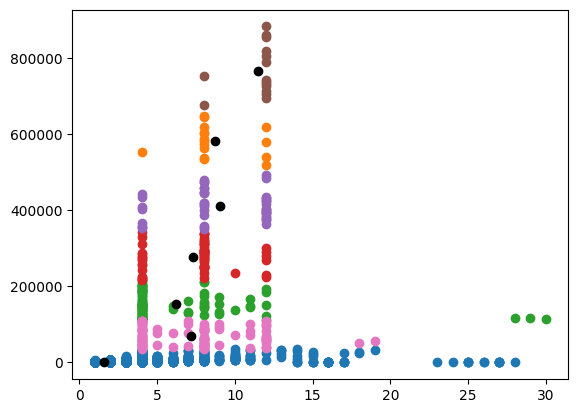